# Project 01

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

Mount Google Drive to this notebook to easily access training data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import packages

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython.core.pylabtools import figsize

Download training images and labels

In [4]:
all_images = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_images', 'rb'))
all_labels = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_labels', 'rb'))

Split the data into training and testing sets

In [5]:
data_split = 50000

train_images = all_images[:data_split,:,:]
train_labels = all_labels[:data_split,]

test_images = all_images[data_split:,:,:]
test_labels = all_labels[data_split:,]

Plot random images with labels to visualize the training data

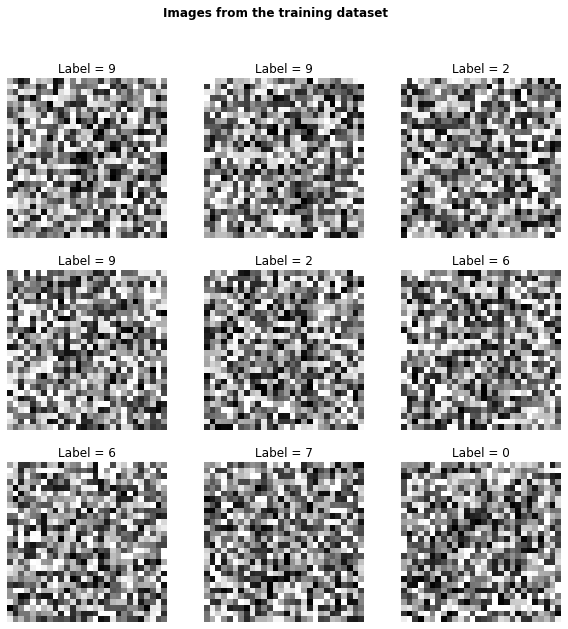

In [27]:
# create figure to randomly display training data
fig1, ax1 = plt.subplots(3,3,figsize=(10,10))
fig1.suptitle("Images from the training dataset", fontweight="bold")

for ii in range(9):
  # generate random number in training set
  n = np.random.choice(data_split)

  # plot training images to subplot
  ax1 = plt.subplot(3, 3, ii + 1)
  ax1.set_title(f"Label = {train_labels[n]}")
  plt.imshow(train_images[n], cmap=plt.cm.binary)
  plt.axis('off')

plt.show()

Create a simple convolutional neural network

In [30]:
inputs = keras.Input(shape=(28, 28, 1))

x = layers.Rescaling(1./255) (inputs)

# convolutional and  max pooling layers
x = layers.Conv2D(32, 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(64, 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)

x = layers.Flatten() (x)
x = layers.Dropout(0.5) (x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                       

In [31]:
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath="noisy_MNIST_convnet.keras",
                      monitor="val_loss",
                      save_best_only=True
                  )]

In [32]:
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    validation_split=0.4,
                    batch_size=32,
                    callbacks=callbacks_list)

Epoch 1/50
938/938 [==============================] - 13s 5ms/step - loss: 2.2504 - accuracy: 0.1569 - val_loss: 2.0504 - val_accuracy: 0.2921
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 1.9821 - accuracy: 0.3015 - val_loss: 1.8074 - val_accuracy: 0.3752
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 1.7864 - accuracy: 0.3800 - val_loss: 1.6367 - val_accuracy: 0.4381
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 1.6595 - accuracy: 0.4286 - val_loss: 1.5008 - val_accuracy: 0.4941
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 1.5801 - accuracy: 0.4573 - val_loss: 1.4368 - val_accuracy: 0.5153
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 1.5375 - accuracy: 0.4749 - val_loss: 1.3848 - val_accuracy: 0.5350
Epoch 7/50
938/938 [==============================] - 6s 6ms/step - loss: 1.4919 - accuracy: 0.4886 - val_loss: 1.4347 - val_accuracy: 0.5276
Epoch

In [33]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

Plot training and validation loss

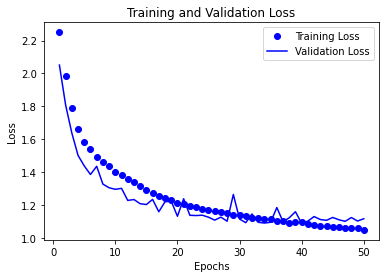

In [34]:
# create figure for training and validation loss
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, train_loss_values, "bo", label="Training Loss")
ax3.plot(epochs, val_loss_values, "b", label="Validation Loss")
ax3.set_title("Training and Validation Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Loss")
ax3.legend()
plt.show()

Plot training and validation accuracy

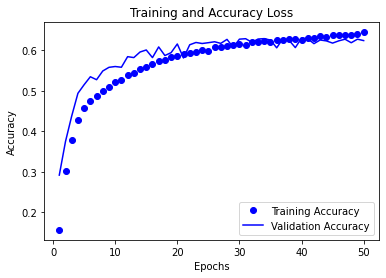

In [35]:
# create figure for training data
fig4, ax4 = plt.subplots()

# plot
ax4.plot(epochs, train_acc_values, "bo", label="Training Accuracy")
ax4.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
ax4.set_title("Training and Accuracy Loss")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Accuracy")
ax4.legend()
plt.show()

In [36]:
# print final results
results = model.evaluate(test_images, test_labels)
print(f'Network loss:     {results[0]}')
print(f'Network accuracy: {results[1]}')

313/313 [==============================] - 3s 10ms/step - loss: 1.1210 - accuracy: 0.6194
Network loss:     1.121025562286377
Network accuracy: 0.6194000244140625


In [230]:
predictions = model.predict(test_images)

In [231]:
for idx in range(10):

  print('Prediction: %i' % predictions[idx].argmax())
  print(predictions[idx][predictions[idx].argmax()]*100)

  tf.print('Truth: %i\n' % test_labels[idx])

Prediction: 1
70.19960284233093
Truth: 9

Prediction: 5
22.568653523921967
Truth: 1

Prediction: 1
51.696908473968506
Truth: 9

Prediction: 0
83.13740491867065
Truth: 0

Prediction: 0
76.10774636268616
Truth: 4

Prediction: 9
49.634477496147156
Truth: 4

Prediction: 0
99.832683801651
Truth: 2

Prediction: 2
51.832592487335205
Truth: 5

Prediction: 3
59.31263566017151
Truth: 3

Prediction: 7
49.120694398880005
Truth: 9



In [5]:
data_augmentation = keras.Sequential([
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ])

# data_augmentation.build(input_shape=(28,28))
# data_augmentation.summary()